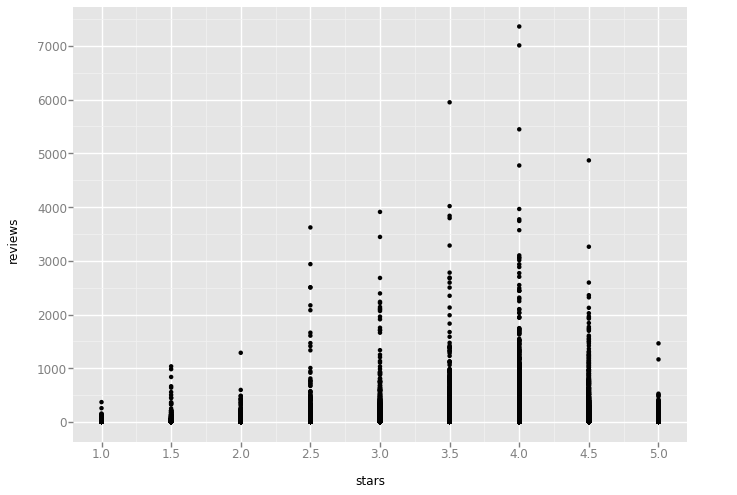

<ggplot: (310711893)>

In [37]:
from pyspark import SparkConf, SparkContext
import json
import pandas as pd
from ggplot import *

#conf = SparkConf().setMaster("local").setAppName("Yelp Dataset Analysis")
#sc = SparkContext(conf=conf)

def ret_dict(x):
    jsonObj = json.loads(x)
    return (jsonObj["stars"], jsonObj["review_count"])


input = sc.textFile("file:///Users/yashparikh/Project/dataset/business.json")
data_lines = input.map(lambda x: ret_dict(x))

df_pandas = data_lines.toDF().toPandas()
df_pandas.columns = ['stars', 'reviews']
ggplot(aes(x="stars", y = "reviews"), data=df_pandas) + geom_jitter()